# Classification problem

## Binary classification
Is this declared class or not.

## Multiclass  lassification
Assign element to one of multiple classes.

## Multilabel classification
Assign multiple labels for an element.

## WHat's gonna be covered
* Architecture of classification NN model
* Input/output shapes of classification model (features & labels)
* Creating custom data to view and fit
* Steps in modelling
  * Creating, compiling, fitting, evaluating a model
* Different classification evaluation methods
* Saving & loading models

# Introduction to NN classification with TF

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


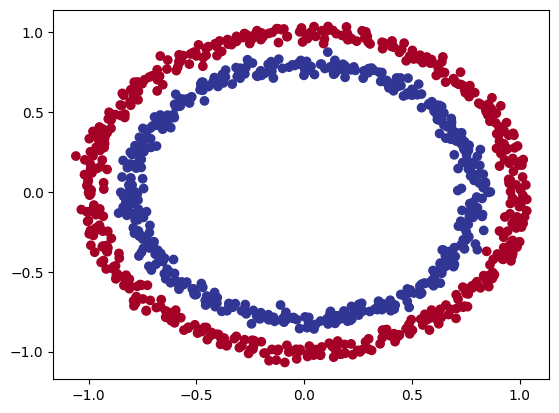

In [6]:
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu)

## Inspect Input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# view first example of features and labels
X[1], y[1]

(array([-0.75615888,  0.15325888]), np.int64(1))

## Steps in modeling
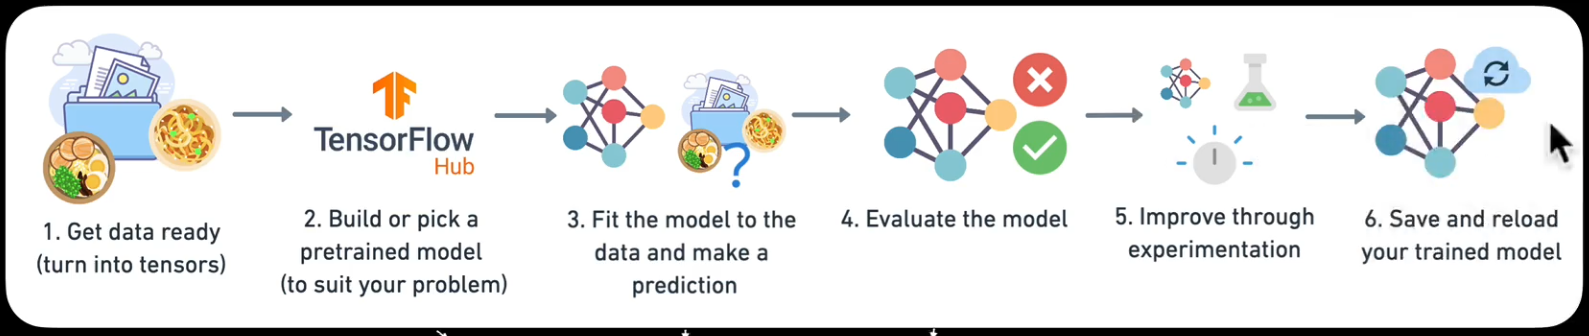

### Prepare train and test sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


### Build or pick model

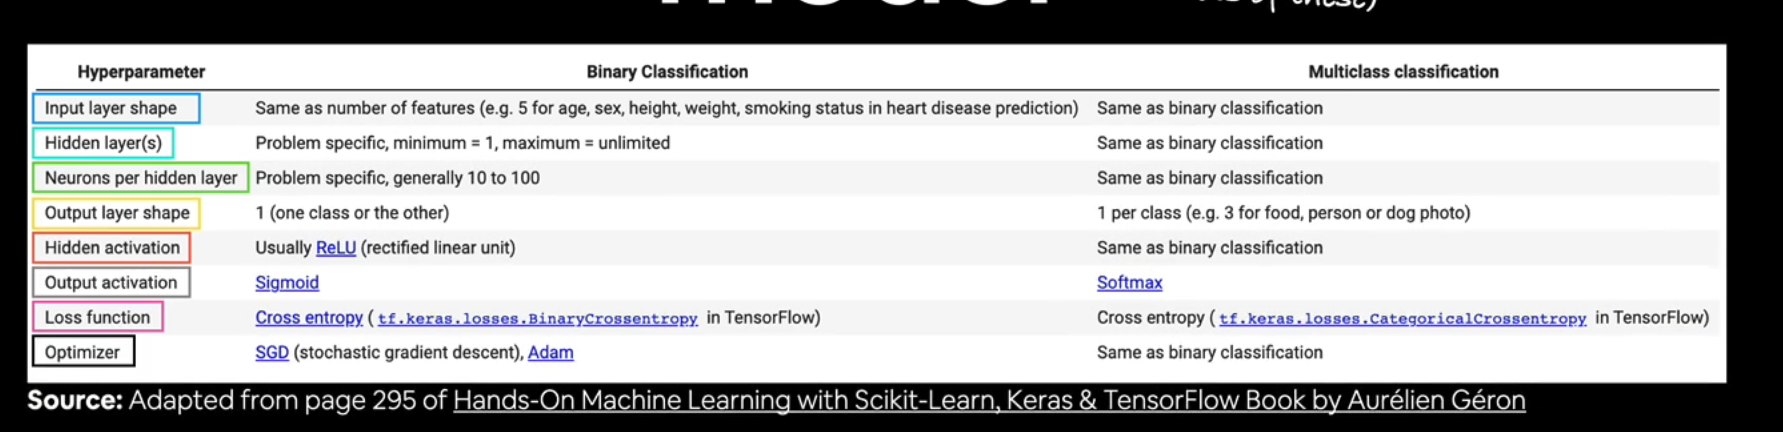

In [17]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
import keras.losses as losses 
import tensorflow as tf
tf.random.set_seed(42)

classification_model_1 = models.Sequential()
classification_model_1.add(layer=layers.InputLayer(shape=(2,)))
classification_model_1.add(layers.Dense(10, activation="relu"))
classification_model_1.add(layers.Dense(1, activation="sigmoid"))

classification_model_1.compile(optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

### Model prepared on training movie

In [25]:
tf.random.set_seed(42)

classification_model_2 = models.Sequential()
classification_model_2.add(layers.Dense(1))

classification_model_2.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_2.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4678 - loss: 4.1786  
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4848 - loss: 1.5865  
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5036 - loss: 0.7517  
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 0.7166  
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4978 - loss: 0.7038  


### Improve

Experiment 1:
Train for longer.

In [27]:
tf.random.set_seed(42)

classification_model_3 = models.Sequential()
classification_model_3.add(layers.Dense(1))

classification_model_3.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [28]:
classification_model_3.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5093 - loss: 7.9090 


[8.05904769897461, 0.5]

### Improve 2

Experiment 2: add layer

In [29]:
tf.random.set_seed(42)

classification_model_4 = models.Sequential()
classification_model_4.add(layers.Dense(1))
classification_model_4.add(layers.Dense(1))

classification_model_4.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_4.fit(X_train, y_train, epochs=200, verbose=0)

In [30]:
classification_model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4424 - loss: 0.6939 


[0.693459153175354, 0.47999998927116394]

### Back to start model

In [31]:
tf.random.set_seed(42)

classification_model_1 = models.Sequential()
classification_model_1.add(layer=layers.InputLayer(shape=(2,)))
classification_model_1.add(layers.Dense(10, activation="relu"))
classification_model_1.add(layers.Dense(1, activation="sigmoid"))

classification_model_1.compile(optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5042 - loss: 0.6853  
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5217 - loss: 0.6828  
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5242 - loss: 0.6810  
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5179 - loss: 0.6796  
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5373 - loss: 0.6783  
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5358 - loss: 0.6772  
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 0.6761  
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5513 - loss: 0.6751  
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5610 - loss: 0.6741 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5704 - loss: 0.6731  
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5830 - loss: 0.6721  
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

In [32]:
classification_model_1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.3465 


[0.3555799126625061, 0.9950000047683716]

In [38]:
X_test[0]

array([-0.37519302,  0.68265972])

In [43]:
y_pred = classification_model_1.predict(X_test)
y_pred, y_test

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(array([[0.7921089 ],
        [0.36604127],
        [0.8628737 ],
        [0.25191686],
        [0.65599585],
        [0.54688656],
        [0.17531066],
        [0.35819417],
        [0.7842549 ],
        [0.3505974 ],
        [0.46806657],
        [0.7802564 ],
        [0.20682397],
        [0.76894206],
        [0.34612548],
        [0.78721493],
        [0.75943077],
        [0.3032954 ],
        [0.78776485],
        [0.47231784],
        [0.3089742 ],
        [0.23510915],
        [0.8096497 ],
        [0.26711664],
        [0.25785032],
        [0.3164469 ],
        [0.20023115],
        [0.24834384],
        [0.16989952],
        [0.7956169 ],
        [0.6437175 ],
        [0.26323542],
        [0.43045422],
        [0.7212367 ],
        [0.29887053],
        [0.76711255],
        [0.5580956 ],
        [0.78151864],
        [0.69112897],
        [0.75334656],
        [0.7618089 ],
        [0.65884185],
        [0.7785154 ],
        [0.31309065],
        [0.31461215],
        [0